## Fetching dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
# mnist

In [4]:
x, y = mnist['data'], mnist['target']

In [5]:
x[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [6]:
y[0]

'5'

In [7]:
y.shape

(70000,)

In [8]:
%matplotlib inline

In [9]:
import matplotlib
import matplotlib.pyplot as plt

In [10]:
some_digit = x[3601]
some_digit_image = some_digit.reshape(28, 28) # reshaping it to plot

In [11]:
# some_digit_image

(-0.5, 27.5, 27.5, -0.5)

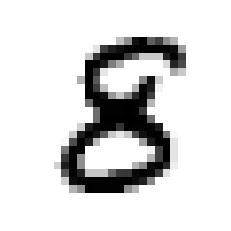

In [12]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [13]:
y[3601]

'8'

In [14]:
x_train, x_test = x[:6000], x[6000:7000]

In [15]:
y_train, y_test = y[:6000], y[6000:7000]

In [16]:
import numpy as np
shuffle_index = np.random.permutation(6000)
x_train , y_train = x_train[shuffle_index], y_train[shuffle_index]

In [17]:
# print(f" x_train ==> {x_train} \n \n y_train ==> {y_train} ") #just checking

In [18]:
# print(f" x_test ==> {x_test} \n \n y_test ==> {y_test}") #just checking

##  Creating a 2 Detector

In [19]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train ==2)
y_test_2 = (y_test ==2)

In [20]:
# print(f"y_train_2 : {y_train_2[30001]} \n y_test : {y_test_2}") # chwcking if 2 then true otherwise flase

In [21]:
# print(f"y_train : {y_train[5]} \n y_test : {y_test[5]}") # checking real number

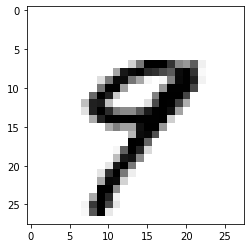

In [22]:
plt.imshow(x_train[5].reshape(28, 28), cmap = matplotlib.cm.binary, interpolation="nearest") # ploting in binary

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(tol = 0.1)
clf.fit(x_train, y_train_2)

In [25]:
clf.predict([some_digit])

array([False])

In [27]:
from sklearn.model_selection import cross_val_score
a  = cross_val_score(clf, x_train , y_train_2, cv=3, scoring = "accuracy")

C:\Users\Mr Rawat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mr Rawat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [28]:
a.mean()

0.9518333333333334

In [29]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train , y_train_2, cv=3)

C:\Users\Mr Rawat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mr Rawat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [30]:
y_train_pred

array([False, False, False, ..., False, False, False])

## Calculating confusion matrix


In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_2, y_train_pred) # this is confusion matrix for perfect predition

array([[5270,  149],
       [ 140,  441]], dtype=int64)

## precision and Recall


In [33]:
from sklearn.metrics import precision_score, recall_score

In [34]:
precision_score(y_train_2, y_train_pred) #this is precision score

0.747457627118644

In [35]:
recall_score(y_train_2, y_train_pred) #this is recall score

0.7590361445783133

## F1- Score

In [36]:
from sklearn.metrics import f1_score

In [37]:
f1_score(y_train_2, y_train_pred)

0.753202391118702